# Mercury levels in Arctic fish species (in ug/g of wet weight)
This dataset contains levels of contaminants and nutrients in Arctic fish species from different regions (Arviat, Clyder River and Resolute Bay in Nunavut, Canada). It also contains biological variables (fish length and weight) and food web tracers (fatty acids, nitrogen and carbon stable isotopes).

This data and statistical analysis are published in Pedro et al 2017 (Environmental Pollution) and Pedro et al 2019 (Chemosphere).

In [155]:
#import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy.stats import f_oneway
import scipy.stats as stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [156]:
#import dataset
contaminants = pd.read_excel(r'C:\Users\Sara\Arctic_fish_contaminants\Results_Forage_fish-CanadianArctic.xlsx', 'Fish_All_Results')

#replace the header with the first row
new_header = contaminants.iloc[0] 
contaminants = contaminants[1:] 
contaminants.columns = new_header 

contaminants.head()

c:\Users\Sara\anaconda3\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Conditional Formatting extension is not supported and will be removed
  warn(msg)


,ID,Family,Species,Common name,Standard Length (mm),Weight (g),Notes,% solid,% lipid organic contaminants,% lipid fatty acids,...,22:1n9,22:1n7,22:2n6,21:5n3,22:4n6,22:5n6,22:4n3,22:5n3,22:6n3,24:1n9
1,ArcticCod-Res1,NaN,NaN,NaN,142,26,NaN,22.314675,2.252907,3.257664,...,2.036895,0.471706,0.010712,0.198332,0.016069,0.117925,0.021441,1.0345,11.599387,0.444893
2,ArcticCod-Res2,Gadidae,Boreogadus saida,Arctic cod,169,35,NaN,21.299342,2.036517,2.533354,...,2.206723,0.446608,0.021682,0.212463,0.007007,0.146754,0.022344,1.187387,15.136446,0.312543
3,ArcticCod-Res3,NaN,NaN,NaN,174,32,NaN,20.859873,1.493363,1.838701,...,1.485606,0.361582,0.007886,0.204269,0,0.180817,0.031442,1.532769,17.229924,0.290864
4,ArcticCod-Res4,Gadidae,missing,NaN,156,27,NaN,21.443384,3.414634,3.529257,...,2.21533,0.575986,0.011077,0.221533,0.011077,0.09969,0.044307,1.052282,10.578201,0.398759
5,ArcticCod-Res5,NaN,NaN,NaN,141,20,NaN,21.199671,3.414634,3.820741,...,2.591113,0.653832,0.012108,0.193728,0,0.096864,0.072648,0.920208,8.802518,0.399564


In [157]:
contaminants.columns #ID has an extra space that needs to be corrected
contaminants.columns = contaminants.columns.str.strip()
list(contaminants.columns)

['ID',
 'Family',
 'Species',
 'Common name',
 'Standard Length (mm)',
 'Weight (g)',
 'Notes',
 '% solid',
 '% lipid organic contaminants',
 '% lipid fatty acids',
 'Collection date (DD/MM/YYYY)',
 'Location',
 'Collection location (GPS coordinates, if possible)',
 'Tissues received',
 'Stable isotopes (C and N)',
 'Total mercury (THg)',
 'Methylmercury (MeHg)',
 'Selenium',
 'Fatty acids',
 'Organic contaminants',
 'Individuals pooled',
 'Pooled?',
 'δ13C (‰)',
 'δ15N (‰)',
 'Total Mercury',
 'MeHg',
 'Selenium',
 '1,2,4,5-TeClBz',
 '1,2,3,4-TeClBz',
 'PeClBz',
 'HCB',
 'OCS',
 't-nonachlor',
 "pp'-DDE",
 'mirex',
 'α-BHC',
 'β-BHC',
 'γ-BHC',
 'o-chlordane',
 't-chlordane',
 'c-chlordane',
 "pp'-DDD",
 'c-nonachlor',
 "pp'-DDT",
 'heptachlor epoxide',
 'dieldrin',
 'PCB 18/17',
 'PCB31/28',
 'PCB33',
 'PCB52',
 'PCB49',
 'PCB44',
 'PCB74',
 'PCB70',
 'PCB95',
 'PCB101',
 'PCB99',
 'PCB87',
 'PCB110',
 'PCB 151/82',
 'PCB149',
 'PCB118',
 'PCB153',
 'PCB 105/132',
 'PCB138',
 'PCB158

In [158]:
contaminants[['Fish','Region']] = contaminants.ID.str.split(pat='-',expand=True)
contaminants['Region'] = contaminants['Region'].str.slice(0,3)
contaminants.head()

,ID,Family,Species,Common name,Standard Length (mm),Weight (g),Notes,% solid,% lipid organic contaminants,% lipid fatty acids,...,22:2n6,21:5n3,22:4n6,22:5n6,22:4n3,22:5n3,22:6n3,24:1n9,Fish,Region
1,ArcticCod-Res1,NaN,NaN,NaN,142,26,NaN,22.314675,2.252907,3.257664,...,0.010712,0.198332,0.016069,0.117925,0.021441,1.0345,11.599387,0.444893,ArcticCod,Res
2,ArcticCod-Res2,Gadidae,Boreogadus saida,Arctic cod,169,35,NaN,21.299342,2.036517,2.533354,...,0.021682,0.212463,0.007007,0.146754,0.022344,1.187387,15.136446,0.312543,ArcticCod,Res
3,ArcticCod-Res3,NaN,NaN,NaN,174,32,NaN,20.859873,1.493363,1.838701,...,0.007886,0.204269,0,0.180817,0.031442,1.532769,17.229924,0.290864,ArcticCod,Res
4,ArcticCod-Res4,Gadidae,missing,NaN,156,27,NaN,21.443384,3.414634,3.529257,...,0.011077,0.221533,0.011077,0.09969,0.044307,1.052282,10.578201,0.398759,ArcticCod,Res
5,ArcticCod-Res5,NaN,NaN,NaN,141,20,NaN,21.199671,3.414634,3.820741,...,0.012108,0.193728,0,0.096864,0.072648,0.920208,8.802518,0.399564,ArcticCod,Res


In [159]:
contaminants.rename(columns={'δ13C (‰)': 'C13', 'δ15N (‰)': 'N15'}, inplace=True)

In [160]:
# Calculate trophic position and relative carbon source based on nitrogen 15 and carbon 13 stable isotopes  
# this corrects for baseline differences among regions based on values in copepodes from each region (from other studies)

conditions = [
    (contaminants['Region'] == 'Arv'),
    (contaminants['Region'] == 'Cly'),
    (contaminants['Region'] == 'Res')
]

valuescopepodsN = [8.4, 8.5, 9.4]

valuescopepodsC = [-21.3, -21.3, -21.7]

contaminants['baseline_N15'] = np.select(conditions, valuescopepodsN)
contaminants['baseline_C13'] = np.select(conditions, valuescopepodsC)



contaminants.head()


,ID,Family,Species,Common name,Standard Length (mm),Weight (g),Notes,% solid,% lipid organic contaminants,% lipid fatty acids,...,22:4n6,22:5n6,22:4n3,22:5n3,22:6n3,24:1n9,Fish,Region,baseline_N15,baseline_C13
1,ArcticCod-Res1,NaN,NaN,NaN,142,26,NaN,22.314675,2.252907,3.257664,...,0.016069,0.117925,0.021441,1.0345,11.599387,0.444893,ArcticCod,Res,9.4,-21.7
2,ArcticCod-Res2,Gadidae,Boreogadus saida,Arctic cod,169,35,NaN,21.299342,2.036517,2.533354,...,0.007007,0.146754,0.022344,1.187387,15.136446,0.312543,ArcticCod,Res,9.4,-21.7
3,ArcticCod-Res3,NaN,NaN,NaN,174,32,NaN,20.859873,1.493363,1.838701,...,0,0.180817,0.031442,1.532769,17.229924,0.290864,ArcticCod,Res,9.4,-21.7
4,ArcticCod-Res4,Gadidae,missing,NaN,156,27,NaN,21.443384,3.414634,3.529257,...,0.011077,0.09969,0.044307,1.052282,10.578201,0.398759,ArcticCod,Res,9.4,-21.7
5,ArcticCod-Res5,NaN,NaN,NaN,141,20,NaN,21.199671,3.414634,3.820741,...,0,0.096864,0.072648,0.920208,8.802518,0.399564,ArcticCod,Res,9.4,-21.7


In [161]:
contaminants['TrophicPosition'] = contaminants.apply(
    lambda row: 2 + (row.N15-row.baseline_N15) / 3.8, axis=1)

contaminants['RelativeCarbonSource'] = contaminants.apply(
    lambda row: row.C13/row.baseline_C13, axis=1)

contaminants.head()

,ID,Family,Species,Common name,Standard Length (mm),Weight (g),Notes,% solid,% lipid organic contaminants,% lipid fatty acids,...,22:4n3,22:5n3,22:6n3,24:1n9,Fish,Region,baseline_N15,baseline_C13,TrophicPosition,RelativeCarbonSource
1,ArcticCod-Res1,NaN,NaN,NaN,142,26,NaN,22.314675,2.252907,3.257664,...,0.021441,1.0345,11.599387,0.444893,ArcticCod,Res,9.4,-21.7,3.582551,0.911646
2,ArcticCod-Res2,Gadidae,Boreogadus saida,Arctic cod,169,35,NaN,21.299342,2.036517,2.533354,...,0.022344,1.187387,15.136446,0.312543,ArcticCod,Res,9.4,-21.7,3.645971,0.939183
3,ArcticCod-Res3,NaN,NaN,NaN,174,32,NaN,20.859873,1.493363,1.838701,...,0.031442,1.532769,17.229924,0.290864,ArcticCod,Res,9.4,-21.7,3.705395,0.908068
4,ArcticCod-Res4,Gadidae,missing,NaN,156,27,NaN,21.443384,3.414634,3.529257,...,0.044307,1.052282,10.578201,0.398759,ArcticCod,Res,9.4,-21.7,3.410676,0.917942
5,ArcticCod-Res5,NaN,NaN,NaN,141,20,NaN,21.199671,3.414634,3.820741,...,0.072648,0.920208,8.802518,0.399564,ArcticCod,Res,9.4,-21.7,3.376301,0.924599


In this analysis I will look at the influence of trophic position, relative carbon source, and fish weight on methylmercury (the organic form of mercury) and selenium accumulation in fishes.

In [162]:
#use only the necessary columns for the analysis
mercury = contaminants[['Fish', 'Region', 'Weight (g)', 'TrophicPosition','RelativeCarbonSource', 'MeHg', 'Selenium']]

mercury.head()

,Fish,Region,Weight (g),TrophicPosition,RelativeCarbonSource,MeHg,Selenium,Selenium
1,ArcticCod,Res,26,3.582551,0.911646,0.038919,Yes,0.633446
2,ArcticCod,Res,35,3.645971,0.939183,0.037346,Yes,0.431243
3,ArcticCod,Res,32,3.705395,0.908068,0.040053,Yes,0.580675
4,ArcticCod,Res,27,3.410676,0.917942,0.031343,Yes,0.635502
5,ArcticCod,Res,20,3.376301,0.924599,0.025971,Yes,0.53809


In [163]:
#There are two columns named Selenium - I want to rename one of them and remove it
mercury.columns = ['Fish', 'Region', 'Weight', 'TrophicPosition','RelativeCarbonSource', 'MeHg', 'Selenium_measured', 'Selenium']
mercury.head()

,Fish,Region,Weight,TrophicPosition,RelativeCarbonSource,MeHg,Selenium_measured,Selenium
1,ArcticCod,Res,26,3.582551,0.911646,0.038919,Yes,0.633446
2,ArcticCod,Res,35,3.645971,0.939183,0.037346,Yes,0.431243
3,ArcticCod,Res,32,3.705395,0.908068,0.040053,Yes,0.580675
4,ArcticCod,Res,27,3.410676,0.917942,0.031343,Yes,0.635502
5,ArcticCod,Res,20,3.376301,0.924599,0.025971,Yes,0.53809


In [164]:
mercury = mercury[['Fish', 'Region', 'Weight', 'TrophicPosition','RelativeCarbonSource', 'MeHg', 'Selenium']]

In [165]:
mercury[['Fish', 'Region']] = mercury[['Fish', 'Region']].astype('category')

In [167]:
mercury.dtypes #they are all objects but I need some variables to be integers and others to be categories

Fish                    category
Region                  category
Weight                    object
TrophicPosition          float64
RelativeCarbonSource     float64
MeHg                      object
Selenium                  object
dtype: object

In [168]:
mercury[['Weight', 'MeHg', 'Selenium']] = mercury[['Weight', 'MeHg', 'Selenium']].astype('float')

In [169]:
mercury.dtypes

Fish                    category
Region                  category
Weight                   float64
TrophicPosition          float64
RelativeCarbonSource     float64
MeHg                     float64
Selenium                 float64
dtype: object

Some descriptive statistics

In [170]:
mercury.describe()

,Weight,TrophicPosition,RelativeCarbonSource,MeHg,Selenium
count,123.000000,123.000000,123.000000,123.000000,120.000000
mean,111.785285,3.807948,0.916741,0.088538,0.564375
std,222.136552,0.378653,0.077860,0.093591,0.278188
min,2.700000,3.102359,0.667505,0.008480,0.239961
25%,13.730000,3.577685,0.886757,0.024830,0.427779
50%,27.000000,3.705395,0.915143,0.040667,0.504360
75%,77.510000,3.942577,0.973465,0.127623,0.598114
max,1243.000000,4.974410,1.087000,0.414601,1.912182


In [171]:
mercury.groupby("Fish").describe().reset_index() #though I removed amphipods and glacier lanternfish, they still show 

Fish Weight                                                     \
                     count        mean         std     min       25%      50%   
0         ArcticCod   40.0   28.677750   11.854466   12.26   19.9425   27.000   
1           Capelin   11.0    8.702727    3.593233    4.00    6.1350    9.500   
2             Cisco    5.0  773.800000  203.566205  623.00  640.0000  702.000   
3  GoiterBlacksmelt    4.0   22.832500   15.860665    7.17   15.3075   19.665   
4      GreenlandCod   10.0  532.400000  345.511923  151.00  273.0000  430.500   
5           Nshrimp   10.0   13.203000    1.745655   10.64   12.1125   13.130   
6         Sandlance   13.0    3.796154    0.878071    2.70    3.1200    3.660   
7           Sculpin   30.0  101.368000   68.517594   18.99   37.1150   87.515   

                     TrophicPosition  ...      MeHg           Selenium  \
        75%      max           count  ...       75%       max    count   
0   31.8650    60.68            40.0  ...  0.038152  0.049735     40.0   
1    9.7500    14.97            11.0  ...  0.013487  0.021309     10.0   
2  784.0000  1120.00             5.0  ...  0.112091  0.206452      5.0   
3   27.1900    44.83             4.0  ...  0.021154  0.023025      4.0   
4  735.0000  1243.00            10.0  ...  0.148099  0.323377     10.0   
5   14.7575    15.67            10.0  ...  0.219641  0.266078     10.0   
6    4.2000     5.47            13.0  ...  0.024559  0.039875     11.0   
7  158.7525   227.52            30.0  ...  0.228125  0.414601     30.0   

                                                                         
       mean       std       min       25%       50%       75%       max  
0  0.493401  0.098740  0.326394  0.426121  0.473574  0.553775  0.719190  
1  0.502595  0.070945  0.380463  0.493895  0.503042  0.506180  0.620739  
2  0.313606  0.072142  0.252215  0.256957  0.282566  0.358452  0.417841  
3  0.290468  0.070983  0.239961  0.247673  0.263818  0.306613  0.394274  
4  0.408802  0.061713  0.337636  0.362096  0.392262  0.464063  0.512113  
5  0.554145  0.070793  0.452514  0.506280  0.563130  0.582266  0.689971  
6  1.149274  0.540777  0.572611  0.648422  1.189053  1.602447  1.912182  
7  0.598721  0.171015  0.354931  0.491963  0.544533  0.639767  1.082087  

[8 rows x 41 columns]

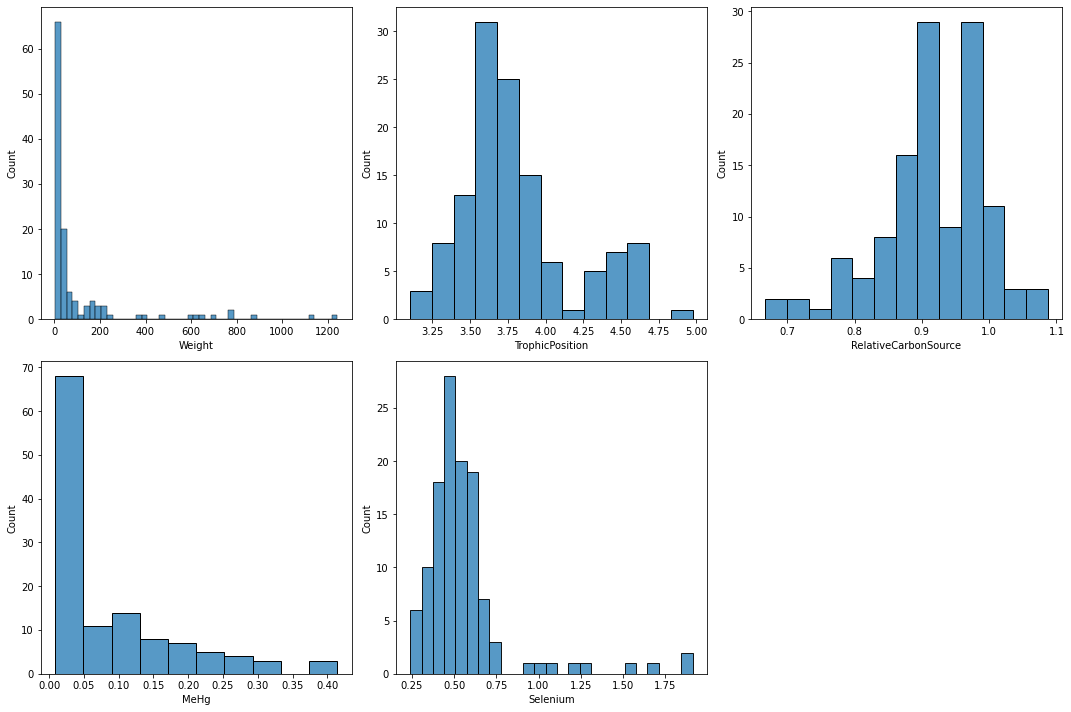

In [172]:
#Histograms
cols = 3
rows = 2
num_cols = mercury.select_dtypes('float64').columns
fig = plt.figure(figsize=(cols*5, rows*5))
for i, col in enumerate(num_cols):
    
    ax=fig.add_subplot(rows,cols,i+1)
    
    sns.histplot(x = mercury[col], ax = ax)
    
fig.tight_layout()  
plt.show()  #the distribution for mercury and selenium levels are not normal distributions

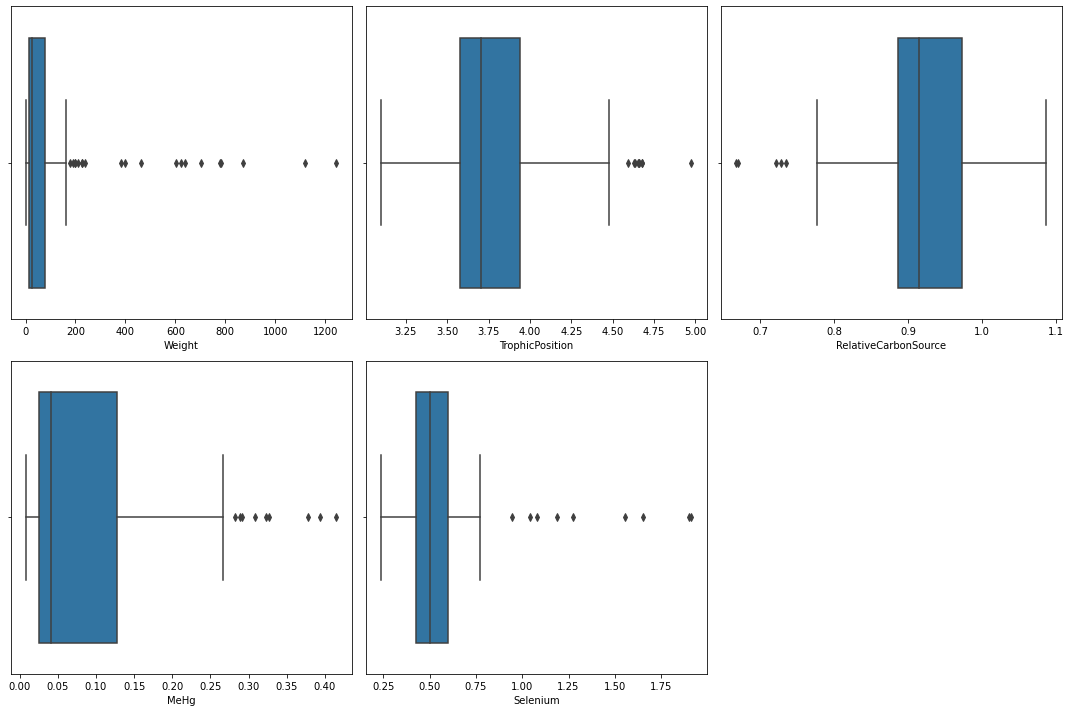

In [173]:
#Boxplots
cols = 3
rows = 2
num_cols = mercury.select_dtypes('float64').columns
fig = plt.figure(figsize=(cols*5, rows*5))
for i, col in enumerate(num_cols):
    
    ax=fig.add_subplot(rows,cols,i+1)
    
    sns.boxplot(x = mercury[col], ax = ax)
    
fig.tight_layout()  
plt.show()  #there seem to be some outliers in the distributions of variables - yet this may be normal since this dataset includes several fish species
                #that have different distributions in the water column and diets that affect mercury levels

# Are there differences among species and regions?

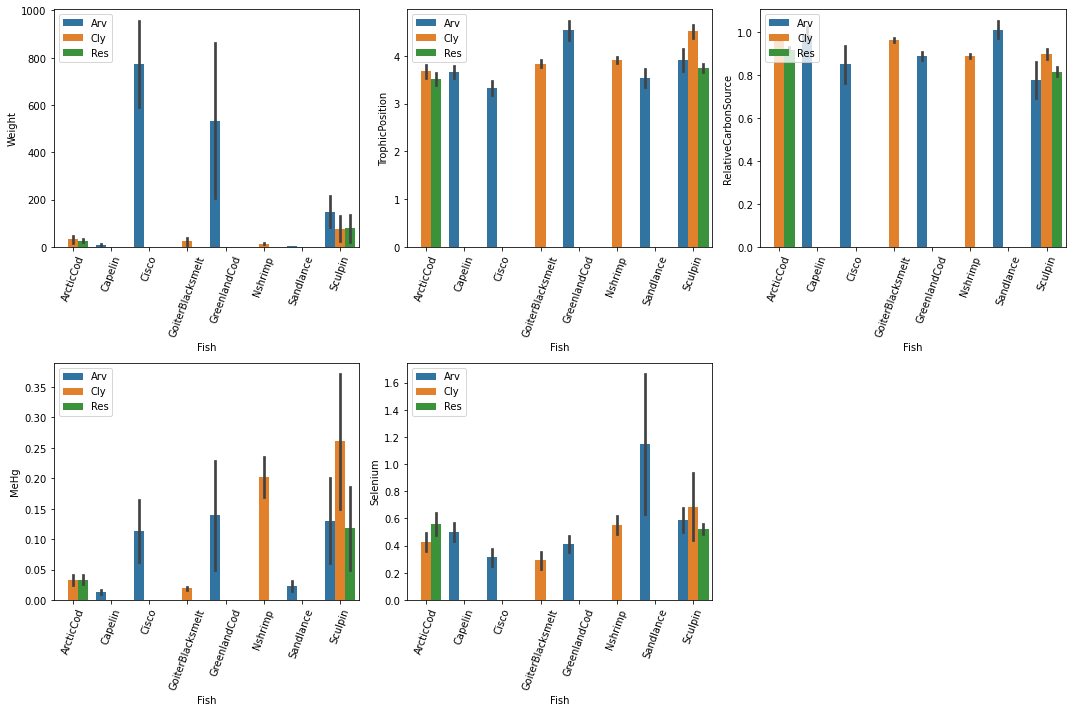

In [174]:
cols = 3
rows = 2
num_cols = mercury.select_dtypes('float64').columns
fig = plt.figure(figsize=(cols*5, rows*5))
for i, col in enumerate(num_cols):
    
    ax=fig.add_subplot(rows,cols,i+1)
    
    sns.barplot(x = mercury['Fish'], y=mercury[col], hue=mercury['Region'], ci = 'sd', ax = ax)

    plt.xticks(rotation=70)

    ax.legend(loc='upper left')


fig.tight_layout()     
plt.show()

We can see differences among species (and regions): 
- The highest Hg levels are found in sculpin in Clyde River and the lowest in capelin 
- Sand lance had the highest levels of selenium, and goiter blacksmelt had the lowest
- The largest fish are cisco and Greenland cod, and sand lance is the smallest
- Fishes at the highest trophic positions are Greenland cod and sculpin in Clyde River, and the lowest is cisco  
- Fish that feed more on the water column have higher (or closer to 1 - more comparable to copepods) values for relative carbon sources (capelin and sand lance) and fish that feed more on shallow waters have lower values (sculpin)


Although there seems to be some differences among species for those that were collected in more than one region, to facilitate the analyses I will group the fish based on species or family (in the case of sculpins in the family Cottidae) only. Further, I will also include in this analysis the fish species for which I only have a few individuals (small sample size).

Mercury

In [175]:
# How different are the species statistically? To compare using linear models I have to transform the mercury variable since linear models assume
# normal distribution

mercury['log_MeHg'] = np.log10(mercury['MeHg'])
mercury.head()


,Fish,Region,Weight,TrophicPosition,RelativeCarbonSource,MeHg,Selenium,log_MeHg
1,ArcticCod,Res,26.0,3.582551,0.911646,0.038919,0.633446,-1.409839
2,ArcticCod,Res,35.0,3.645971,0.939183,0.037346,0.431243,-1.427755
3,ArcticCod,Res,32.0,3.705395,0.908068,0.040053,0.580675,-1.397361
4,ArcticCod,Res,27.0,3.410676,0.917942,0.031343,0.635502,-1.503856
5,ArcticCod,Res,20.0,3.376301,0.924599,0.025971,0.538090,-1.585519


<AxesSubplot:xlabel='log_MeHg', ylabel='Count'>

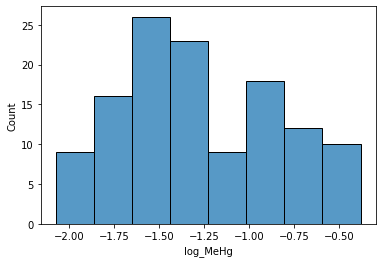

In [176]:
sns.histplot(x = mercury['log_MeHg']) # closer to normal distribution

In [177]:
modelSpeciesHg = smf.ols(formula = 'log_MeHg ~ -1 + Fish', data = mercury).fit() #the minus before the 1 treats the groups in the same way
modelSpeciesHg.params

Fish[ArcticCod]          -1.494371
Fish[Capelin]            -1.905950
Fish[Cisco]              -0.986228
Fish[GoiterBlacksmelt]   -1.723801
Fish[GreenlandCod]       -0.940002
Fish[Nshrimp]            -0.699705
Fish[Sandlance]          -1.679798
Fish[Sculpin]            -0.853475
dtype: float64

In [178]:
sm.stats.anova_lm(modelSpeciesHg) #we can tell that the fish mean values are different - the F is very high and the p value very low so we can
                                    #reject the hyphotesis that there are no differences among species in Hg levels

,df,sum_sq,mean_sq,F,PR(>F)
Fish,8.0,218.300941,27.287618,795.598372,7.042596e-97
Residual,115.0,3.944297,0.034298,NaN,NaN


In [179]:
# Which species differ from which?
tukey = pairwise_tukeyhsd(mercury.log_MeHg, groups = mercury["Fish"], alpha=0.05) 
print(tukey)

          Multiple Comparison of Means - Tukey HSD, FWER=0.05           
     group1           group2      meandiff p-adj   lower   upper  reject
------------------------------------------------------------------------
       ArcticCod          Capelin  -0.4116    0.0 -0.6062 -0.2169   True
       ArcticCod            Cisco   0.5081    0.0  0.2369  0.7794   True
       ArcticCod GoiterBlacksmelt  -0.2294   0.27 -0.5293  0.0704  False
       ArcticCod     GreenlandCod   0.5544    0.0  0.3522  0.7565   True
       ArcticCod          Nshrimp   0.7947   -0.0  0.5925  0.9968   True
       ArcticCod        Sandlance  -0.1854 0.0437  -0.368 -0.0029   True
       ArcticCod          Sculpin   0.6409   -0.0  0.5028   0.779   True
         Capelin            Cisco   0.9197    0.0  0.6113  1.2281   True
         Capelin GoiterBlacksmelt   0.1821 0.6972 -0.1517   0.516  False
         Capelin     GreenlandCod   0.9659   -0.0  0.7161  1.2158   True
         Capelin          Nshrimp   1.2062   -0.0  

# Can we explain the variation in MeHg based on fish weight and food web processes?

In this first analysis, I am considering the fish community as a whole. Let's see which explanatory variables correlate with MeHg and if any variables correlate with each other.

In [180]:
#Correlation mattrix
correlations = mercury.corr()
correlations

,Weight,TrophicPosition,RelativeCarbonSource,MeHg,Selenium,log_MeHg
Weight,1.000000,0.293535,-0.372281,0.325041,-0.258796,0.388863
TrophicPosition,0.293535,1.000000,-0.256348,0.623630,-0.089709,0.593673
RelativeCarbonSource,-0.372281,-0.256348,1.000000,-0.482186,0.263302,-0.635046
MeHg,0.325041,0.623630,-0.482186,1.000000,-0.068010,0.910322
Selenium,-0.258796,-0.089709,0.263302,-0.068010,1.000000,-0.084379
log_MeHg,0.388863,0.593673,-0.635046,0.910322,-0.084379,1.000000


We can also look at the relationship between variables with a correlation matrix, but in this case we are not considering variation among species. From this table we can see that the variables that seem to correlate more with overall MeHg levels are trophic position and relative carbon source.

<AxesSubplot:>

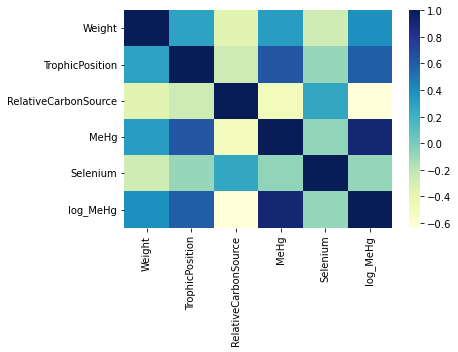

In [181]:
sns.heatmap(correlations, cmap="YlGnBu") 

In [182]:
model1 = smf.ols('log_MeHg ~ TrophicPosition', mercury).fit()
print(model1.summary()) #Trophic position is significant
print(model1.aic)

                            OLS Regression Results                            
Dep. Variable:               log_MeHg   R-squared:                       0.352
Model:                            OLS   Adj. R-squared:                  0.347
Method:                 Least Squares   F-statistic:                     65.86
Date:                Thu, 11 Aug 2022   Prob (F-statistic):           4.59e-13
Time:                        15:02:52   Log-Likelihood:                -45.648
No. Observations:                 123   AIC:                             95.30
Df Residuals:                     121   BIC:                             100.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -3.8842      0.324    -

In [183]:
model2 = smf.ols('log_MeHg ~ TrophicPosition + RelativeCarbonSource', mercury).fit()
print(model2.summary()) 
print(model2.aic)
#Relative Carbon Source is also significant, the r squared increased and the aic decreased 
# This model explains more of the variation in MeHg levels in the fish community

                            OLS Regression Results                            
Dep. Variable:               log_MeHg   R-squared:                       0.602
Model:                            OLS   Adj. R-squared:                  0.595
Method:                 Least Squares   F-statistic:                     90.75
Date:                Thu, 11 Aug 2022   Prob (F-statistic):           9.84e-25
Time:                        15:03:09   Log-Likelihood:                -15.714
No. Observations:                 123   AIC:                             37.43
Df Residuals:                     120   BIC:                             45.86
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -0.6383 

In [184]:
model3 = smf.ols('log_MeHg ~ TrophicPosition + RelativeCarbonSource + Weight', mercury).fit()
print(model3.summary()) #Weight is not significant and it actually increases the aic
print(model3.aic)

                            OLS Regression Results                            
Dep. Variable:               log_MeHg   R-squared:                       0.607
Model:                            OLS   Adj. R-squared:                  0.597
Method:                 Least Squares   F-statistic:                     61.15
Date:                Thu, 11 Aug 2022   Prob (F-statistic):           5.39e-24
Time:                        15:03:13   Log-Likelihood:                -15.006
No. Observations:                 123   AIC:                             38.01
Df Residuals:                     119   BIC:                             49.26
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -0.7073 

To check how good the model is, I will use a few diagnostics

c:\Users\Sara\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Residuals')

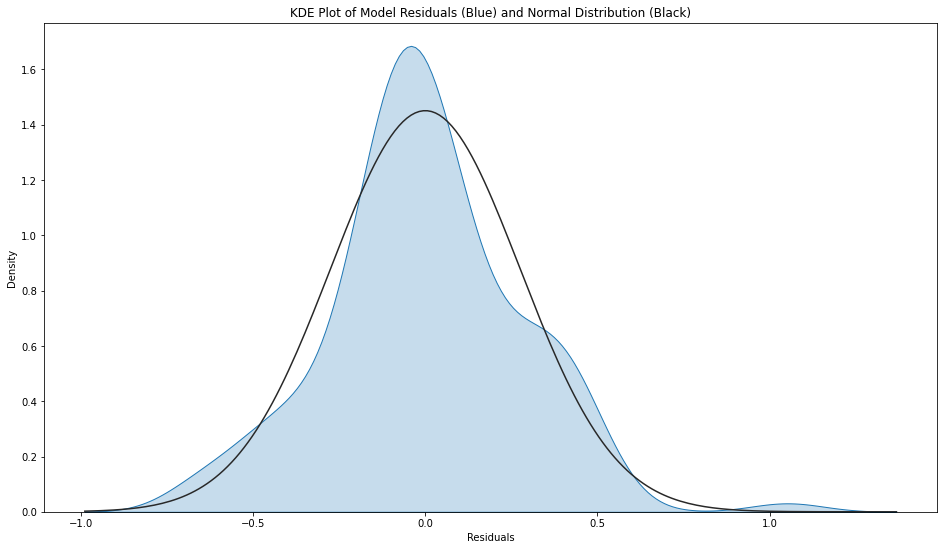

In [185]:
fig = plt.figure(figsize = (16, 9))

ax = sns.distplot(model2.resid, hist = False, kde_kws = {"shade" : True, "lw": 1}, fit= stats.norm)

ax.set_title("KDE Plot of Model Residuals (Blue) and Normal Distribution (Black)")
ax.set_xlabel("Residuals")

Text(0.5, 1.0, 'Q-Q Plot')

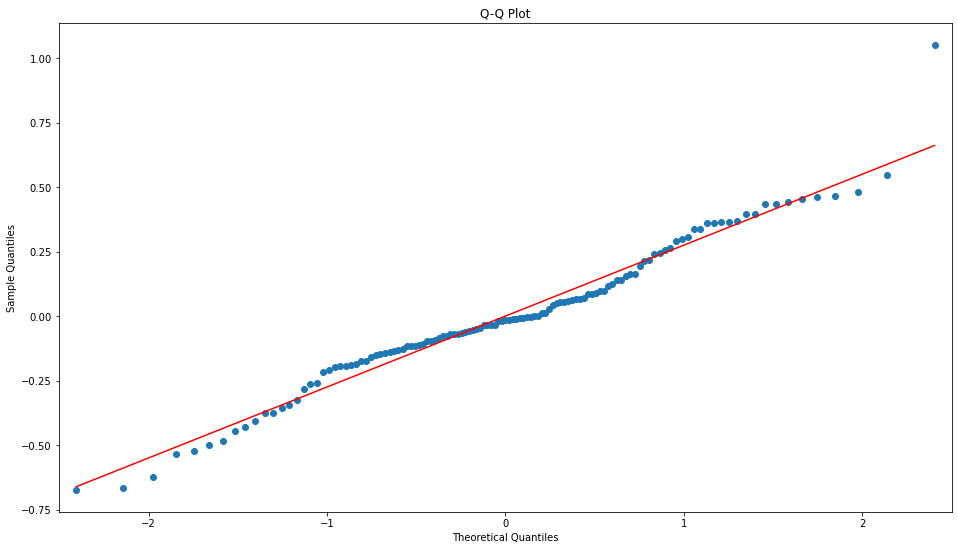

In [186]:
fig = plt.figure(figsize = (16, 9))
ax = fig.add_subplot(111)

sm.qqplot(model2.resid, dist = stats.norm, line = 's', ax = ax)

ax.set_title("Q-Q Plot")

There is some deviation from normality when looking at the distribution of the model residuals. We can do the Shapiro-Wilk test to confirm this.

In [187]:
labels = ["Statistic", "p-value"]

norm_res = stats.shapiro(model2.resid)

for key, val in dict(zip(labels, norm_res)).items():
    print(key, val)

Statistic 0.9745954871177673
p-value 0.020076129585504532


The results (p-value <0.05) confirm violation of the model assumption of normality. This could be due to the presence of outliers (there seems to be one at least). Let's look at the assumption of homoscedascity.

Text(0, 0.5, 'Residuals')

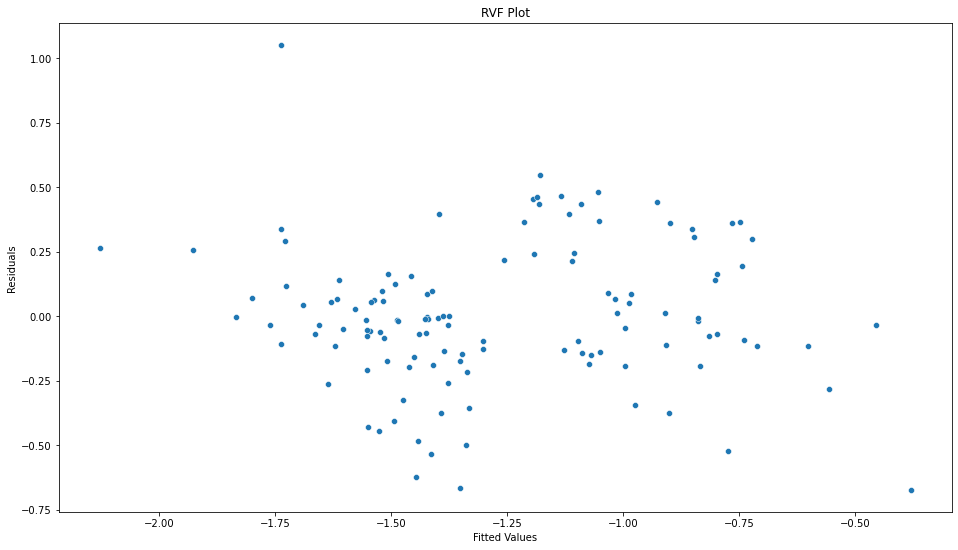

In [188]:
fig = plt.figure(figsize = (16, 9))

ax = sns.scatterplot(y = model2.resid, x = model2.fittedvalues)

ax.set_title("RVF Plot")
ax.set_xlabel("Fitted Values")
ax.set_ylabel("Residuals")

In [189]:
from statsmodels.stats.diagnostic import het_white

het_white_res = het_white(model2.resid, model2.model.exog)

labels = ["LM Statistic", "LM-Test p-value", "F-Statistic", "F-Test p-value"]

for key, val in dict(zip(labels, het_white_res)).items():
    print(key, val)

LM Statistic 6.579870580414698
LM-Test p-value 0.25380678399132
F-Statistic 1.322528778737139
F-Test p-value 0.25934604360065633


This assumption is not violated. But I will try to find the outlier and see if we can improve normality of the model.

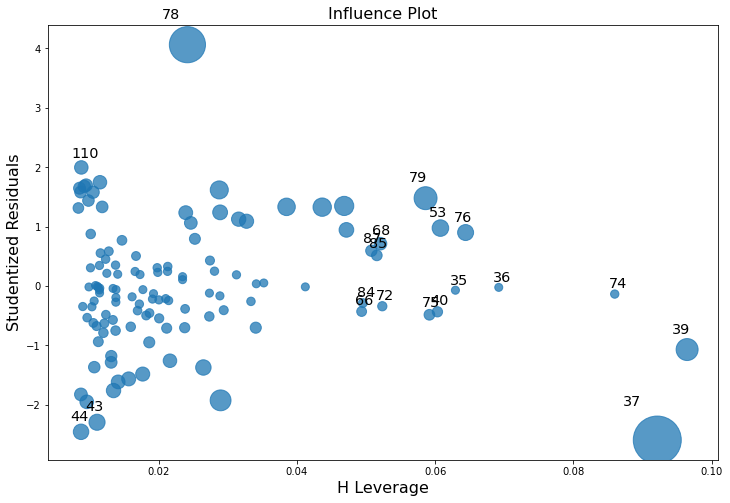

In [190]:
from statsmodels.stats.outliers_influence import OLSInfluence as olsi

# Identify outliers based on leverage (whether a point is far away from the major cluster in the x-space), 
# consistency (whether a point is consistent in terms of fitting in the x,y), and 
# influence - whether a point highly affects the fitting of the model

# here we derive studentized residuals (consistency), leverage and the cook’s distance (influence)
studentized_residuals = olsi(model2).resid_studentized
leverage_pts = olsi(model2).hat_matrix_diag 
cook_dist = olsi(model2).cooks_distance

fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.influence_plot(model2, alpha  = 0.05, ax = ax, criterion="cooks") #The value with the index 78 seems to be an outlier 

In [191]:
mercury.loc[78] #Whether to remove or not the value is discussible - it may just be natural variance in my data, especially since none of the
                #variables seem off the range

Fish                       Cisco
Region                       Arv
Weight                     623.0
TrophicPosition         3.478916
RelativeCarbonSource    1.016531
MeHg                    0.206452
Selenium                0.282566
log_MeHg               -0.685182
Name: 78, dtype: object

In [192]:
#I will remove the value just to check if the model assumption of normality is achieved by doing this
mercuryOut = mercury.drop(78)
mercuryOut.loc[mercuryOut['Fish'] == 'Cisco']

,Fish,Region,Weight,TrophicPosition,RelativeCarbonSource,MeHg,Selenium,log_MeHg
75,Cisco,Arv,1120.0,3.332022,0.779610,0.055164,0.358452,-1.258346
76,Cisco,Arv,784.0,3.238801,0.785240,0.112091,0.252215,-0.950429
77,Cisco,Arv,702.0,3.469453,0.849170,0.091794,0.417841,-1.037185
79,Cisco,Arv,640.0,3.102359,0.830599,0.100000,0.256957,-1.000000


In [193]:
model2Out = smf.ols('log_MeHg ~ TrophicPosition + RelativeCarbonSource', mercuryOut).fit()

labels = ["Statistic", "p-value"]

norm_res = stats.shapiro(model2Out.resid)

for key, val in dict(zip(labels, norm_res)).items():
    print(key, val)
# now we are respecting the normality assumption

Statistic 0.9805244207382202
p-value 0.0749565064907074


Visualize the relationships between explanatory variables and MeHg levels in the fish community.

In [194]:
mercurySummary = mercury.groupby(['Fish']).agg(['mean', 'std'])
mercurySummary.columns = ['_'.join(c).rstrip('_') for c in mercurySummary.columns.to_list()]
mercurySummary.reset_index(inplace=True)
mercurySummary

C:\Users\Sara\AppData\Local\Temp\ipykernel_12864\478862296.py:1: FutureWarning: ['Region'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  mercurySummary = mercury.groupby(['Fish']).agg(['mean', 'std'])


,Fish,Weight_mean,Weight_std,TrophicPosition_mean,TrophicPosition_std,RelativeCarbonSource_mean,RelativeCarbonSource_std,MeHg_mean,MeHg_std,Selenium_mean,Selenium_std,log_MeHg_mean,log_MeHg_std
0,ArcticCod,28.677750,11.854466,3.594147,0.150572,0.945573,0.029340,0.032902,0.007726,0.493401,0.098740,-1.494371,0.101700
1,Capelin,8.702727,3.593233,3.663792,0.129012,0.989257,0.039004,0.012868,0.003838,0.502595,0.070945,-1.905950,0.118121
2,Cisco,773.800000,203.566205,3.324310,0.159376,0.852230,0.096480,0.113100,0.056342,0.313606,0.072142,-0.986228,0.205393
3,GoiterBlacksmelt,22.832500,15.860665,3.839073,0.076853,0.964703,0.008564,0.019099,0.003289,0.290468,0.070983,-1.723801,0.074428
4,GreenlandCod,532.400000,345.511923,4.533022,0.212175,0.889344,0.018140,0.139176,0.094175,0.408802,0.061713,-0.940002,0.282258
5,Nshrimp,13.203000,1.745655,3.918565,0.068702,0.891791,0.009960,0.202329,0.034298,0.554145,0.070793,-0.699705,0.075300
6,Sandlance,3.796154,0.878071,3.539050,0.195036,1.013451,0.042477,0.022256,0.008716,1.149274,0.540777,-1.679798,0.155561
7,Sculpin,101.368000,68.517594,4.060289,0.369422,0.831609,0.072871,0.169544,0.108898,0.598721,0.171015,-0.853475,0.272763


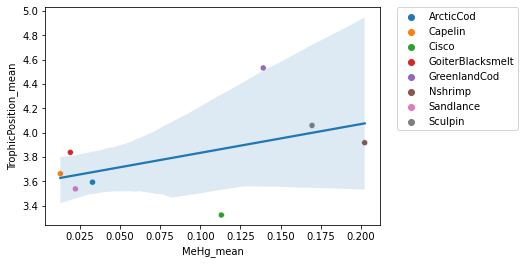

In [195]:
ax = sns.scatterplot(data=mercurySummary, x="MeHg_mean", y="TrophicPosition_mean", hue="Fish")
sns.regplot(data=mercurySummary, x="MeHg_mean", y="TrophicPosition_mean", scatter=False, ax=ax)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

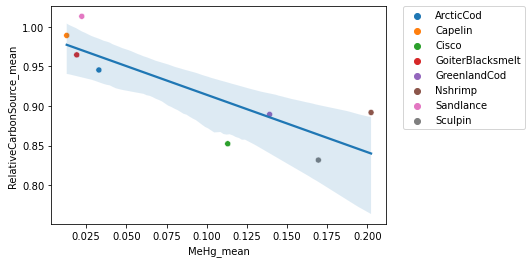

In [196]:
ax = sns.scatterplot(data=mercurySummary, x="MeHg_mean", y="RelativeCarbonSource_mean", hue="Fish")
sns.regplot(data=mercurySummary, x="MeHg_mean", y="RelativeCarbonSource_mean", scatter=False, ax=ax)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

These results show that in this Arctic fish community mercury levels are higher in more predatory fish (higher trophic position) compared to prey fish, and are higher in fish that feed more in shallow waters compared to fish that feed more in the water column.

But is this true for each fish species? 

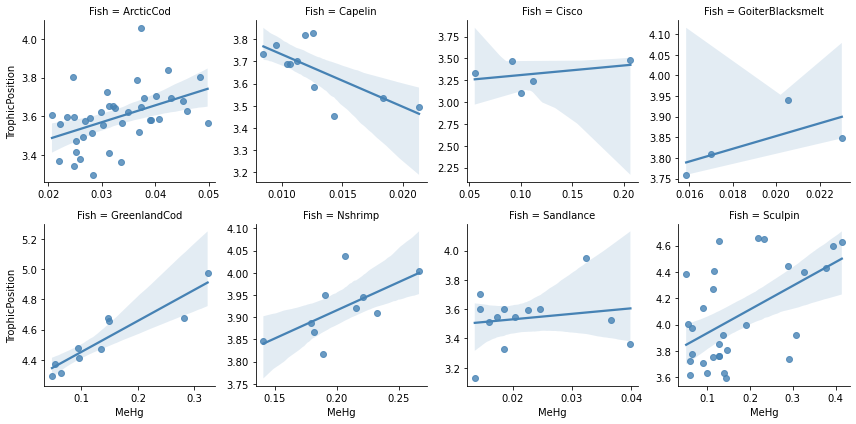

In [197]:
g = sns.FacetGrid(mercury, col='Fish', col_wrap=4,sharex=False, sharey=False)
g.map(sns.regplot, 'MeHg', 'TrophicPosition', color="steelblue")

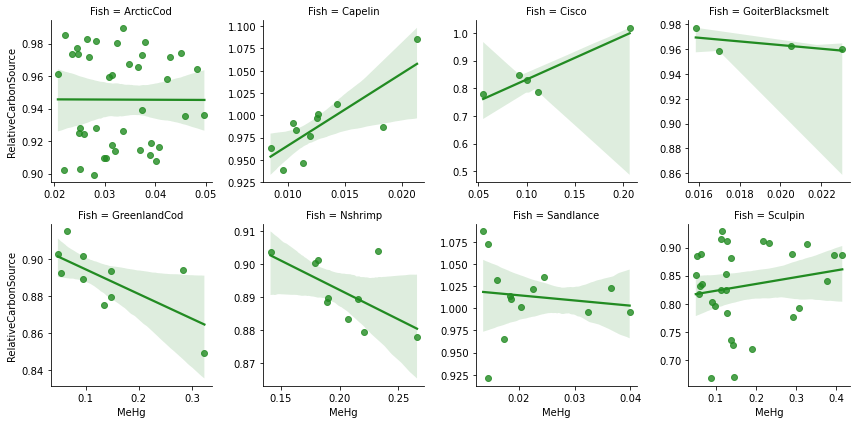

In [198]:
g = sns.FacetGrid(mercury, col='Fish', col_wrap=4,sharex=False, sharey=False)
g.map(sns.regplot, 'MeHg', 'RelativeCarbonSource', color="forestgreen")  

From these figures we can tell that for MeHg:
- for most fish MeHg levels increase with trophic position - the exception here is capelin
- MeHg levels are higher in fish that feed more in shallow marine areas for sand lance, Greenland cod, shrimp and goiter blacksmelt;
weirdly, the opposite is observed for cisco, capelin and sculpin. For Arctic cod there are no apparent effects

Yet, we can see that there is a lot of variability and the number of fish sampled for each species is low to take conclusions.

We can see in the graphs that the intercept and slope of the relationships between explanatory variables and Hg are different for each fish species. If we want to take variability in each species into account, the best approach is to build a regression model with random effects (mixed effects model). Fish species will be the random effects variable (or groups) and the other explanatory variables are the fixed effects. 

In [199]:
memodel = smf.mixedlm('log_MeHg ~ TrophicPosition + RelativeCarbonSource', mercuryOut, groups=mercuryOut['Fish'], re_formula='~TrophicPosition + RelativeCarbonSource') 
memodelfit = memodel.fit()
print(memodelfit.summary()) #when considering the variation within each fish species, trophic position is still slightly significant but
                            # relative carbon source is no longer significant 

c:\Users\Sara\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\Sara\anaconda3\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


                        Mixed Linear Model Regression Results
Model:                       MixedLM           Dependent Variable:           log_MeHg
No. Observations:            122               Method:                       REML    
No. Groups:                  8                 Scale:                        0.0233  
Min. group size:             4                 Log-Likelihood:               34.2431 
Max. group size:             40                Converged:                    Yes     
Mean group size:             15.2                                                    
-------------------------------------------------------------------------------------
                                           Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-------------------------------------------------------------------------------------
Intercept                                  -1.821    0.241 -7.562 0.000 -2.293 -1.349
TrophicPosition                             0.333    0.151  2.198 0.028  0.036